# Analysis of Georgia Medicaid Data: Pre and Post Work Requirements



### by Dubem Okoye

#### Background

Recently in the state of Georgia, there has been an expansion to Medicaid through the implementation of work requirements. This means that healthcare insurance has become more accessible to low-income families in Georgia, however, it is contingent upon those individuals reporting at least 80 hours of work activities to be eligible for the program of Medicaid. Giving this change in Medicaid access, I wanted to analyze how Medicaid coverage has been affected since this policy was passed in July 2023. I will be graphing Medicaid enrollment pre- and post-work requirements in Georgia.

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter, MonthLocator


# Use Centers of Medicaid API to import the current Medicaid data
# Find data set url and use API GET for metadata,
url = "https://data.medicaid.gov/api/1/metastore/schemas/dataset/items/6165f45b-ca93-5bb5-9d06-db29c692a360"

# Make GET request for data and convert to JSON for easy workflow
url_data = (requests.get(url)).json()

Upon reviewing the data from the CMS, I see that the csv file I need to begin data analysis is under the key 'distributions' whose value is a list that contains a dictionary (very confusing). I need the 'downloadURL' value from the url_data variable

In [5]:
# Access the first element of distribution (the list) and call for value under 'downloadURL'
initial_data = url_data['distribution'][0].get('downloadURL')

#print(initial_data) <- For a link to the full dataset please un-comment here!!!

#Read the full Medicaid CSV file into a pandas data frame to begin filtering and analysis
medi_df = pd.read_csv(initial_data)

#Filter data frame by Georgia and by final report (Final report is the monthly status of Medicaid reports)
filtered_medi_df = medi_df.loc[(medi_df['State Abbreviation'] == 'GA') & (medi_df['Final Report'] == 'Y'),
['State Abbreviation', 'Final Report', 'Reporting Period', 'Individuals Determined Eligible for Medicaid at Application',
 'Total Medicaid Enrollment']
]

#Converting reporting period from numerical to datetime
filtered_medi_df['Reporting Period_dt'] = pd.to_datetime(filtered_medi_df['Reporting Period'], format='%Y%m')


filtered_medi_df
#Un-comment above to view Georgia Medicaid dataframe

,State Abbreviation,Final Report,Reporting Period,Individuals Determined Eligible for Medicaid at Application,Total Medicaid Enrollment,Reporting Period_dt
1780,GA,Y,201309,NaN,NaN,2013-09-01
1782,GA,Y,201706,30972.0,1584883.0,2017-06-01
1784,GA,Y,201707,29474.0,1577997.0,2017-07-01
1786,GA,Y,201708,26420.0,1585673.0,2017-08-01
1788,GA,Y,201709,25973.0,1587970.0,2017-09-01
...,...,...,...,...,...,...
1948,GA,Y,202405,35107.0,1751555.0,2024-05-01
1950,GA,Y,202406,26629.0,1761972.0,2024-06-01
1952,GA,Y,202407,29574.0,1762079.0,2024-07-01
1954,GA,Y,202408,30724.0,1763780.0,2024-08-01


I have filtered the nationwide Medicaid dataset only to include Georgia in the data frame and the final reports of each month. The df is then further filtered by only including the columns I need for my analysis. Under "Reporting Period" column, the first four numbers represent the year of the Medicaid report, and the last two are the month (e.g. 201309 = 'August 2013'). I utilized the pandas datetime function to cast the reporting period into a datetime data type column named "Reporting Period_dt". 

I am looking to compare the Medicaid enrollment and determinations before and after July 2023 (202307). 

In [20]:
x = filtered_medi_df['Reporting Period_dt']
y = filtered_medi_df['Total Medicaid Enrollment']

def plot_enpt(df, year, color):
    plt.figure(figsize=(15,8))

    #Setting the x and y axis of the plot using the reporting period datetime v. total enrollement at the time
    plt.plot(df['Reporting Period_dt'], df['Total Medicaid Enrollment'], 
             color = color, linewidth=2, zorder = 5
             )
    plt.grid(alpha = 0.5)

    #Retrieve total enrollement from specified year and assign to 'yr'
    yr = df.loc[df['Reporting Period_dt'] == year, 'Total Medicaid Enrollment'].iloc[0]
    plt.axvline(pd.Timestamp('2023-01-05'), color = 'red', label = "Pathways to Coverage Implementation", 
                linestyle = "-", alpha = 0.5, linewidth=2
                )
    #Add the timepoint of interest
    plt.axvline(pd.Timestamp(year), color = "blue", zorder = 10, linestyle = "-.", 
                alpha = 0.5, label = "Total Enrollment Peak"
                )
    plt.axvline(pd.Timestamp('2020-03-01'), color = "green", zorder = 10, linestyle = "-.", 
                alpha = 1, label = "Families First Coronavirus Response Act (FFCRA)"
                )
    plt.axvline(pd.Timestamp('2023-04-01'), color = "green", zorder = 10, linestyle = "-.", 
                alpha = 1
                )
    plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2023-04-01'), color = "green", 
                alpha= 0.2, label = "Families First Coronavirus Response Act (FFCRA) Period")
    plt.title("Total Medicaid Enrollment", loc = 'center',
              fontdict= {
                  'family': 'Georgia',
                  'size': 15,
                  'weight': 'bold',
              })
    #Get the current axis and modify the ticks to fit the graph and content
    ax = plt.gca()
    y_max = df['Total Medicaid Enrollment'].max() 
    ax.set_yticks(range(0,int(y_max) + 750000, 250000))  
    ax.xaxis.set_major_locator(MonthLocator(bymonth = [1,5,9]))
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.xticks(rotation=75) 

    #Create x & y labels, alone with legend
    plt.xlabel("Reporting Period (YYYY-MM)")
    plt.ylabel("Enrollment (in Millions)")
    plt.legend()
    return plt.show()


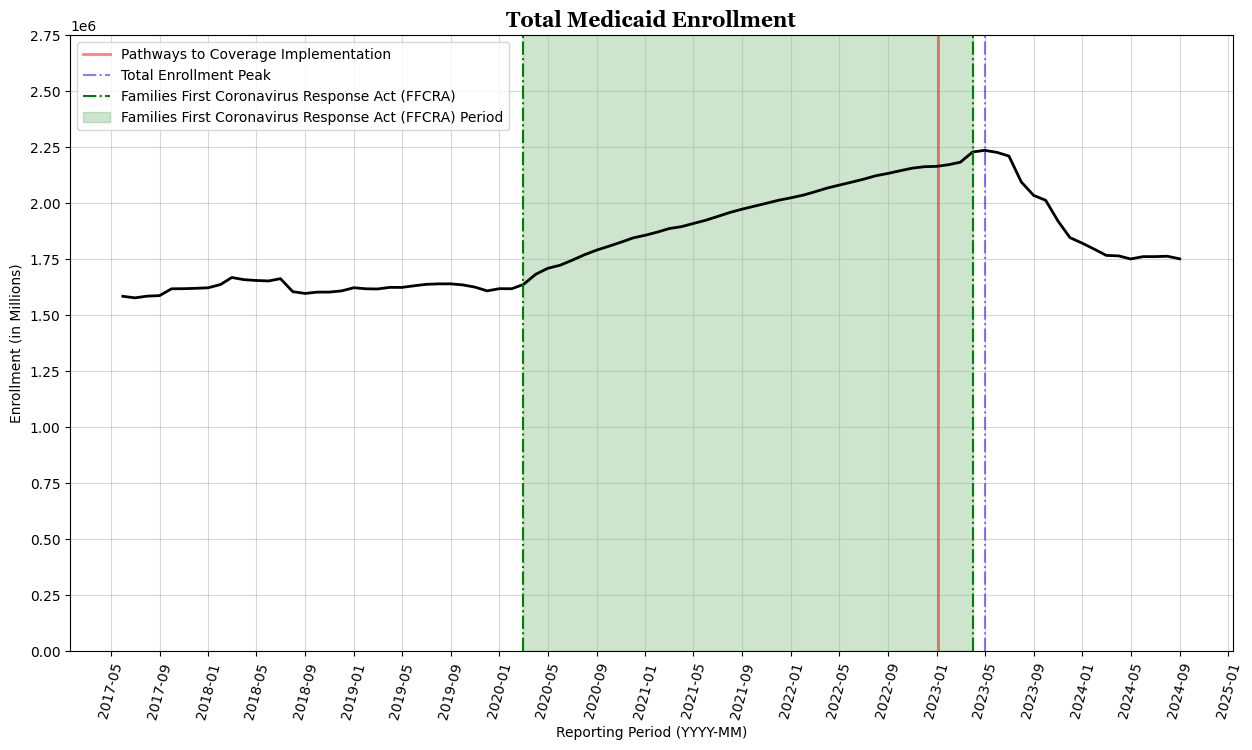

In [21]:
plot_enpt(filtered_medi_df, '2023-05-01', "black")

(array([17287., 17410., 17532., 17652., 17775., 17897., 18017., 18140.,
        18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478., 19601., 19723., 19844., 19967., 20089.]),
 [Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05'),
  Text(19967.0, 0, '2024-09'),
  Text(20089.0, 0, '2025-01')])

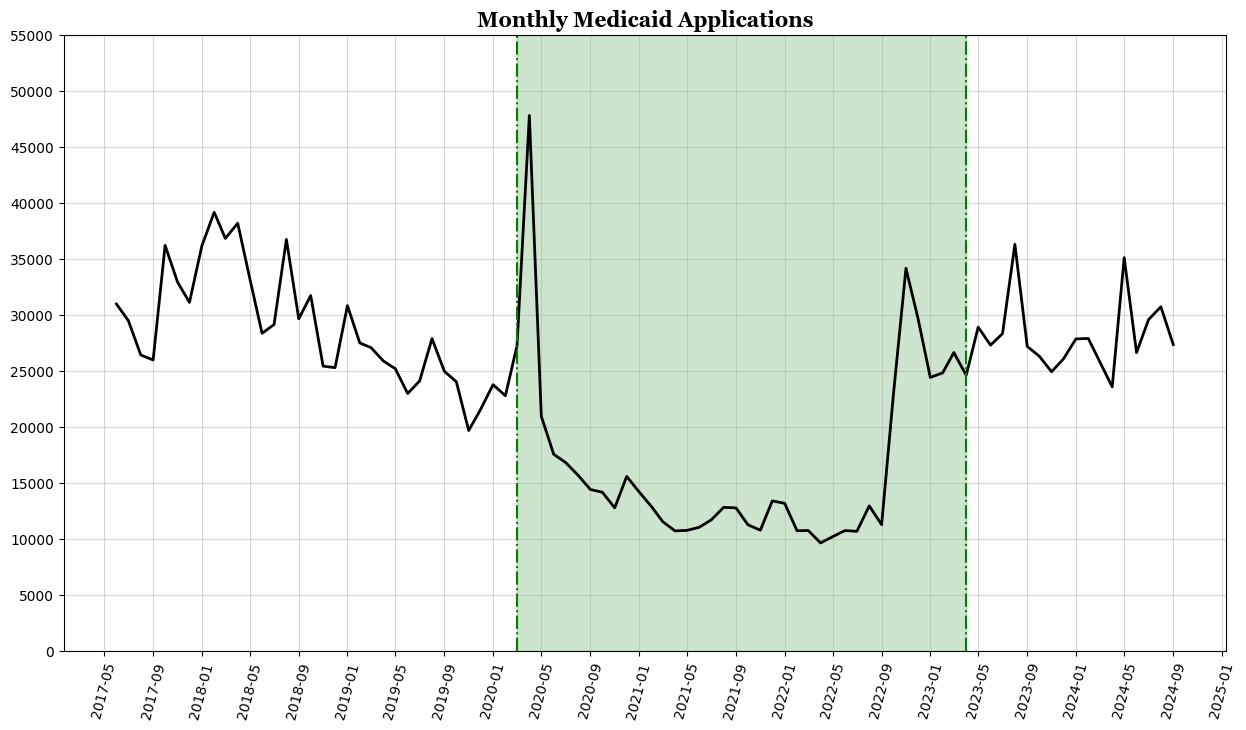

In [32]:
plt.figure(figsize=(15,8))

    #Setting the x and y axis of the plot using the reporting period datetime v. total enrollement at the time
plt.plot(filtered_medi_df['Reporting Period_dt'], filtered_medi_df['Individuals Determined Eligible for Medicaid at Application'], 
color = "black", linewidth=2, zorder = 5
)

plt.axvline(pd.Timestamp('2020-03-01'), color = "green", zorder = 10, linestyle = "-.", 
alpha = 1, label = "Families First Coronavirus Response Act (FFCRA)"
)
plt.axvline(pd.Timestamp('2023-04-01'), color = "green", zorder = 10, linestyle = "-.", 
alpha = 1
)
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2023-04-01'), color = "green", 
alpha= 0.2, label = "Families First Coronavirus Response Act (FFCRA) Period"
)
plt.title("Monthly Medicaid Applications", loc = 'center',
    fontdict= {
        'family': 'Georgia',
        'size': 15,
        'weight': 'bold',
        })
plt.grid(alpha = 0.5)
ax = plt.gca()
y_max = filtered_medi_df['Individuals Determined Eligible for Medicaid at Application'].max() 
ax.set_yticks(range(0,int(y_max) + 10000, 5000))  
ax.xaxis.set_major_locator(MonthLocator(bymonth = [1,5,9]))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=75) 

In [81]:
tp1 = filtered_medi_df.loc[filtered_medi_df['Reporting Period'] == 202307, 'Total Medicaid Enrollment'].iloc[0]
tp2 = filtered_medi_df.loc[filtered_medi_df['Reporting Period'] == 202312, 'Total Medicaid Enrollment'].iloc[0]

answer = ((tp1 - tp2)/tp1)*100

print(answer)


16.471523689213154


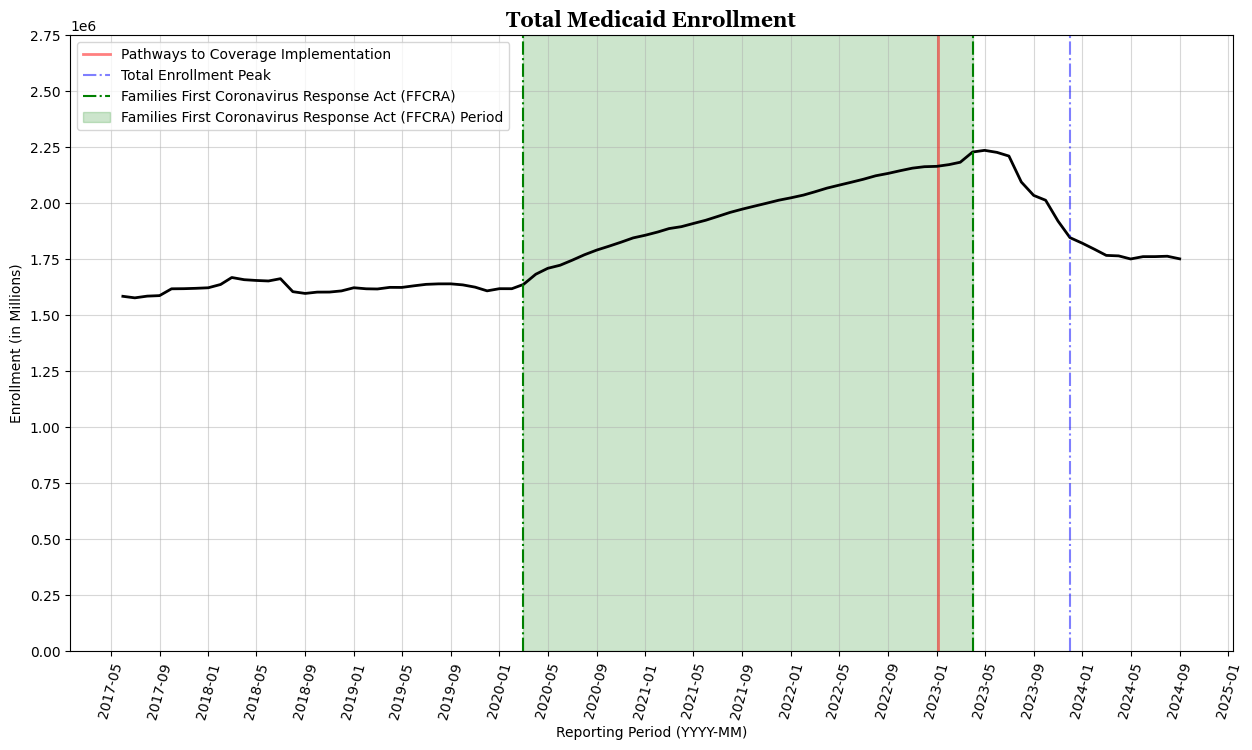

In [24]:
plot_enpt(filtered_medi_df, '2023-12-01', "black")

In [67]:
filtered_medi_df

,State Abbreviation,Final Report,Reporting Period,Individuals Determined Eligible for Medicaid at Application,Total Medicaid Enrollment,Individuals Determined Eligible for Medicaid at Application
1740,GA,Y,201309,NaN,NaN,NaN
1742,GA,Y,201706,30972.0,1584883.0,30972.0
1744,GA,Y,201707,29474.0,1577997.0,29474.0
1746,GA,Y,201708,26420.0,1585673.0,26420.0
1748,GA,Y,201709,25973.0,1587970.0,25973.0
...,...,...,...,...,...,...
1904,GA,Y,202403,25805.0,1767490.0,25805.0
1906,GA,Y,202404,23570.0,1765345.0,23570.0
1908,GA,Y,202405,35107.0,1751555.0,35107.0
1910,GA,Y,202406,26629.0,1761972.0,26629.0


In [ ]:
y2 = filtered_medi_df.loc[filtered_medi_df['Reporting Period'] == 202307, 'Total Medicaid Enrollment'].iloc[0]


plt.figure(figsize=(15,10))
plt.plot(x, y, color = "green")
plt.scatter(202307, y2, color = "red")
plt.grid(color = "pink", alpha = 0.5)

plt.ylabel("Enrollment (in Millions)")
plt.xlabel("Reporting Dates (YYYYMM)")

plt.axvline(202307, color = 'red', label = "Pathways to Coverage Implementation", linestyle = "--", alpha = 0.5)
plt.legend()


fig = plt.gcf()
fig.text(
    0.12, 0.93, "Total Medicaid Enrollment in Georgia", color = "black", fontname = "Georgia", fontsize = 24, weight = "bold"
)
plt.show()

In [4]:
float('{:2f}'.format(y.max()))

print(filtered_medi_df)



     State Abbreviation Final Report  Reporting Period  \
1740                 GA            Y            201309   
1742                 GA            Y            201706   
1744                 GA            Y            201707   
1746                 GA            Y            201708   
1748                 GA            Y            201709   
...                 ...          ...               ...   
1904                 GA            Y            202403   
1906                 GA            Y            202404   
1908                 GA            Y            202405   
1910                 GA            Y            202406   
1912                 GA            Y            202407   

      Individuals Determined Eligible for Medicaid at Application  \
1740                                                NaN             
1742                                            30972.0             
1744                                            29474.0             
1746                       

In [5]:
postwr = 



2236476.0